# Разделительная кластеризация
## Елисеев Е.В.

### Задание

1. Разработайте программу, которая выполняет кластеризацию заданного набора данных <br>
с помощью алгоритмов k‑Means и k-Medoids. Параметрами программы являются набор данных <br>
 и число кластеров. Программа должна выдавать координаты точек и назначенные им кластера, <br>
  а также значение ошибки кластеризации.
2. Проведите эксперименты на наборе данных customers (сведения о клиентах банка: скачать  <br>
zip-архив с данными в формате CSV и описанием).  <br>
3. Выполните визуализацию полученных результатов в следующем виде: <br>
- точечный график, на котором цвет точки отражает принадлежность кластеру;
- зависимость ошибки кластеризации от параметра k. <br>

4. Доработайте программу, добавив в список ее параметров долю зашумленных объектов <br>
 набора. Дополнительно к ранее реализованным функциям программа должна вносить шум  <br>
 в набор данных: случайным образом изменить заданную долю объектов набора (изменение  <br>
 может заключаться в добавлении/вычитании случайного числа к/из одной/нескольких координат объекта). <br>
5. Проведите эксперименты на ранее выбранных наборах данных, варьируя долю зашумленных объектов (1%, 3%, 5%, 10%) и <br>
 используя различные значения параметра  (из интервала 3..9). <br>
6. Выполните визуализацию полученных результатов указанным выше способом. <br>
7. Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. <br>
 Отчет должен представлять собой связный и структурированный документ со следующими разделами:   <br>
формулировка задания; 
- гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами; 
- рисунки с результатами визуализации; 
- пояснения, раскрывающие смысл полученных результатов.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


data = pd.read_csv('customers.csv')
data

,Row,CustomerId,Age,Education,YearsEmployed,Income,CardDebt,OtherDebt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...,...
845,845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [2]:
data = data.drop(columns=['CustomerId', 'Row'])

# Кодируем категориальные признаки
data = pd.get_dummies(data, columns=['Defaulted'], prefix='Defaulted')
data = pd.get_dummies(data, columns=['Education'], prefix='Education')
data

,Age,YearsEmployed,Income,CardDebt,OtherDebt,DebtIncomeRatio,Defaulted_0.0,Defaulted_1.0,Education_1,Education_2,Education_3,Education_4,Education_5
0,41,6,19,0.124,1.073,6.3,True,False,False,True,False,False,False
1,47,26,100,4.582,8.218,12.8,True,False,True,False,False,False,False
2,33,10,57,6.111,5.802,20.9,False,True,False,True,False,False,False
3,29,4,19,0.681,0.516,6.3,True,False,False,True,False,False,False
4,47,31,253,9.308,8.908,7.2,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,27,5,26,0.548,1.220,6.8,False,False,True,False,False,False,False
846,28,7,34,0.359,2.021,7.0,True,False,False,True,False,False,False
847,25,0,18,2.802,3.210,33.4,False,True,False,False,False,True,False
848,32,12,28,0.116,0.696,2.9,True,False,True,False,False,False,False


In [3]:
data.isnull().sum()

Age                0
YearsEmployed      0
Income             0
CardDebt           0
OtherDebt          0
DebtIncomeRatio    0
Defaulted_0.0      0
Defaulted_1.0      0
Education_1        0
Education_2        0
Education_3        0
Education_4        0
Education_5        0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
numeric_columns = ['Age', 'YearsEmployed', 'Income', 'CardDebt', 'OtherDebt', 'DebtIncomeRatio']
categorical = data.drop(columns=numeric_columns)
numeric = data[numeric_columns]
numeric_std = pd.DataFrame(scaler.fit_transform(numeric), columns=numeric_columns)
data_std = pd.concat([numeric_std, categorical], axis=1)
data_std

,Age,YearsEmployed,Income,CardDebt,OtherDebt,DebtIncomeRatio,Defaulted_0.0,Defaulted_1.0,Education_1,Education_2,Education_3,Education_4,Education_5
0,0.742915,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525,True,False,False,True,False,False,False
1,1.489490,2.573721,1.384325,1.414474,1.512962,0.391387,True,False,True,False,False,False,False
2,-0.252518,0.211712,0.268032,2.134141,0.801704,1.597554,False,True,False,True,False,False,False
3,-0.750235,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525,True,False,False,True,False,False,False
4,1.489490,3.311849,5.356249,3.638900,1.716094,-0.442507,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,-0.999093,-0.526415,-0.536737,-0.484243,-0.547213,-0.502070,False,False,True,False,False,False,False
846,-0.874664,-0.231164,-0.329054,-0.573202,-0.311403,-0.472288,True,False,False,True,False,False,False
847,-1.247951,-1.264543,-0.744419,0.576666,0.038633,3.458923,False,True,False,False,False,True,False
848,-0.376947,0.506963,-0.484816,-0.687577,-0.701476,-1.082817,True,False,True,False,False,False,False


In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score


def add_noise(data, noise_fraction):
    num_noisy = int(noise_fraction * len(data))
    noisy_indices = np.random.choice(len(data), size=num_noisy, replace=False)
    noise = np.random.normal(size=(num_noisy, len(numeric_columns)))
    data_noisy = data.copy()
    data_noisy.loc[noisy_indices, numeric_columns] += noise

    return data_noisy


def cluster_data(data:pd.DataFrame, n_clusters:int, method:str = 'kmeans', noise_fraction:float = 0):
    data_with_claster = data.copy()
    
    if noise_fraction != 0:
        data_with_claster = add_noise(data_with_claster, noise_fraction)
    
    if method == 'kmeans':
        clasters = KMeans(n_clusters=n_clusters, random_state=37).fit(data_with_claster)
    else:
        clasters = KMedoids(n_clusters=n_clusters, random_state=37).fit(data_with_claster)

    labels = clasters.labels_
    error = silhouette_score(data_with_claster, labels)
    
    data_with_claster['claster'] = labels
    
    return data_with_claster, error


def visualize_clasters(data:pd.DataFrame):
    color_dict = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'cyan',
    4: 'magenta',
    5: 'yellow',
    6: 'black',
    7: 'purple',
    8: 'pink',
    9: 'brown',
    10: 'orange'
    }
    y = data['claster']
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data.drop(columns='claster'))
    plt.figure(figsize=(16, 9))
    for i, claster in enumerate(data['claster'].unique()):
        plt.scatter(X_pca[y==claster, 0], X_pca[y==claster, 1], color=color_dict[i], alpha=0.5, label=f'claster {i + 1}')
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
    
    
def visualize_k_by_error(data:pd.DataFrame, method:str = 'kmeans', noise_fraction:float = 0):
    data_copy = data.copy()
    if noise_fraction != 0:
        data_copy = add_noise(data_copy, noise_fraction)
    
    k_list = [x for x in range(2, 10)]
    errors = []
    for k in k_list:
        _, error = cluster_data(data_copy, k, method)
        errors.append(error)
        
    plt.figure(figsize=(16, 9))
    plt.plot(k_list, errors)
    plt.title('Зависимость ошибки кластеризации от числа кластеров')
    plt.ylabel('Ошибка')
    plt.xlabel('Число кластеров')
    plt.grid(True)
    plt.show()

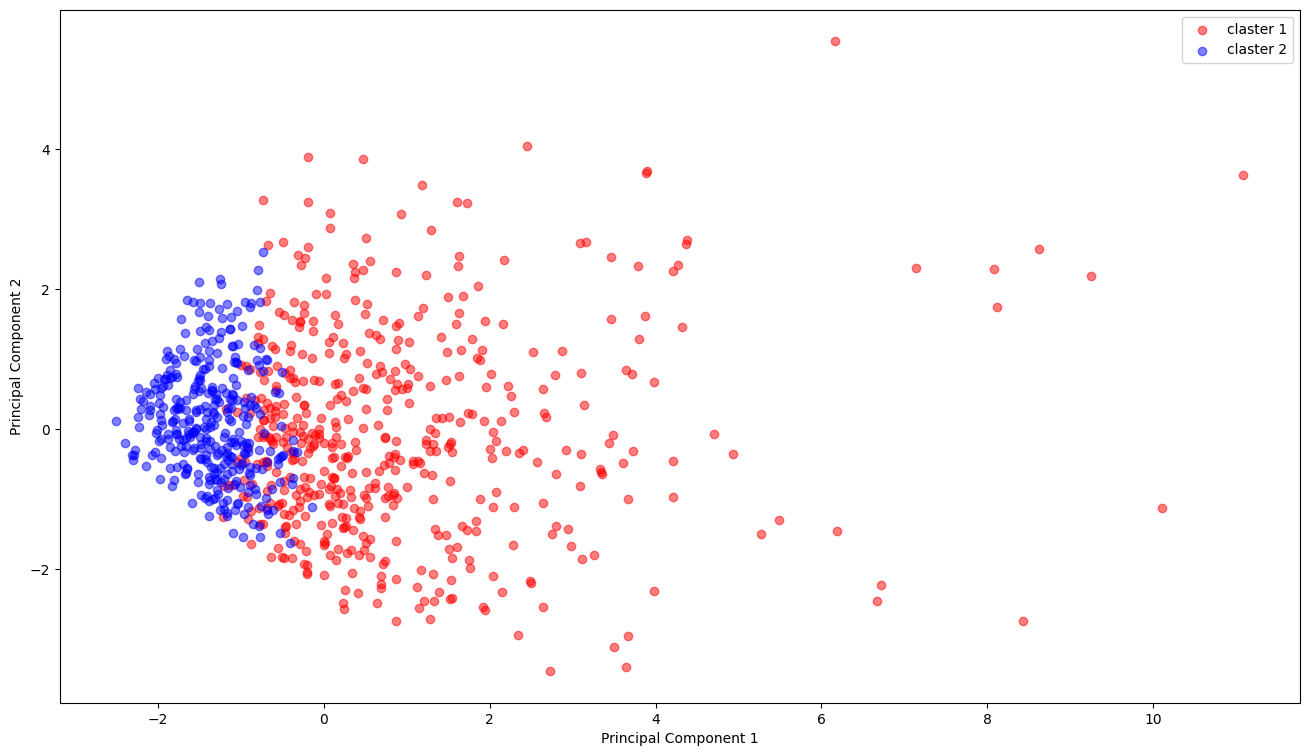

Ошибка: 0.15497172082046118


In [6]:
clasters, error = cluster_data(data_std, 2, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

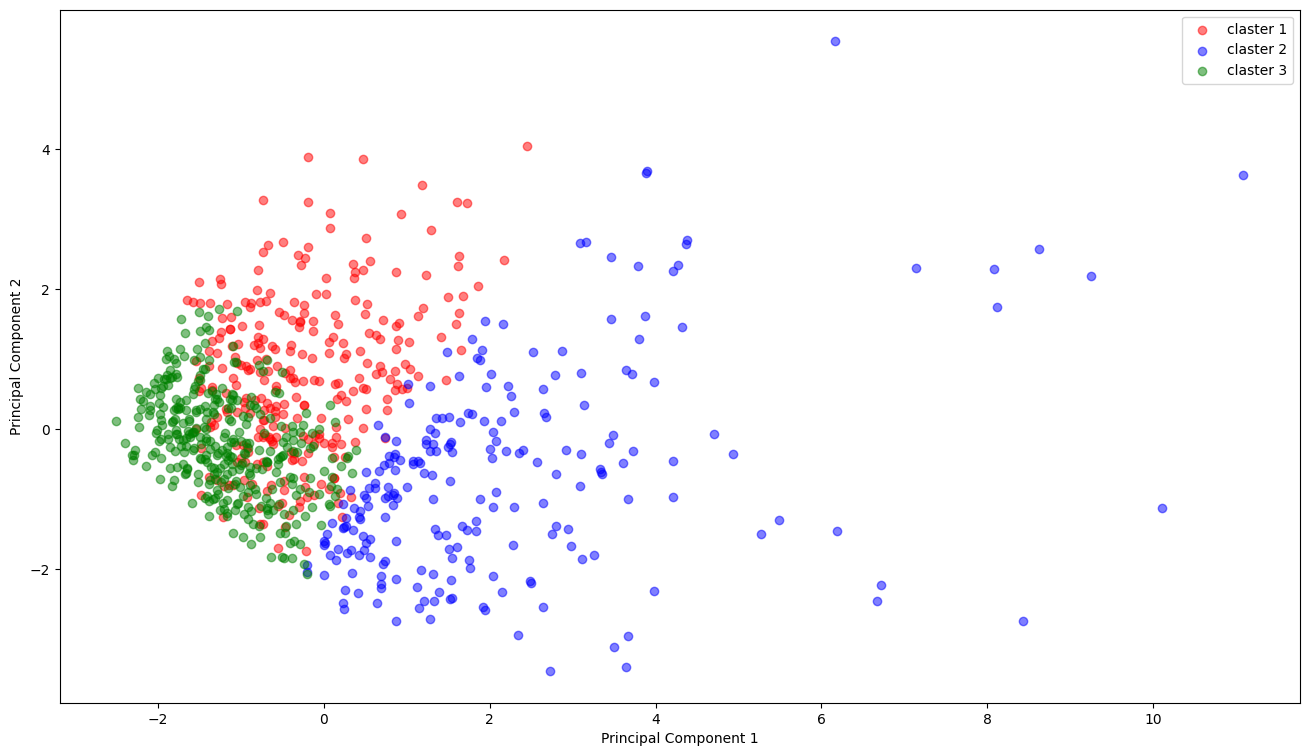

Ошибка: 0.13047569558296074


In [7]:
clasters, error = cluster_data(data_std, 3, method='kmedoids')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

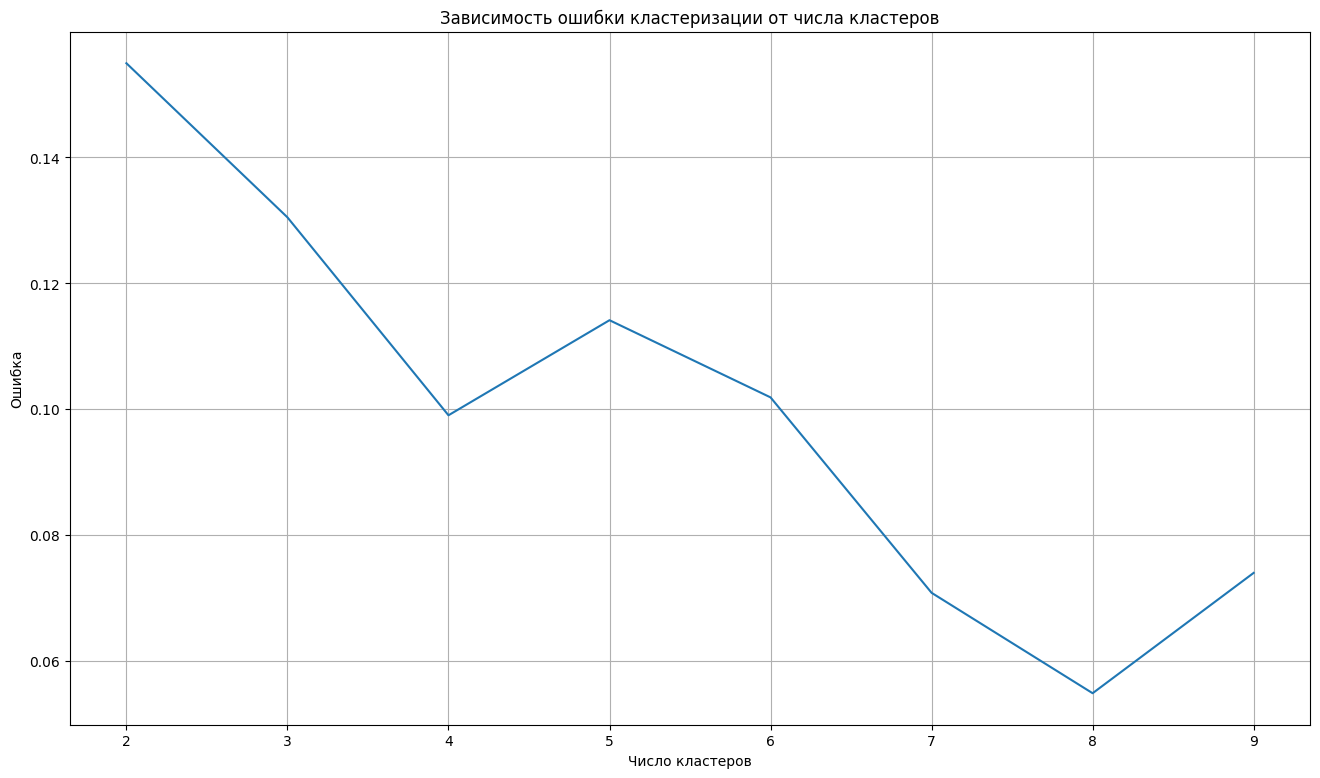

In [8]:
visualize_k_by_error(data_std, 'kmedoids')

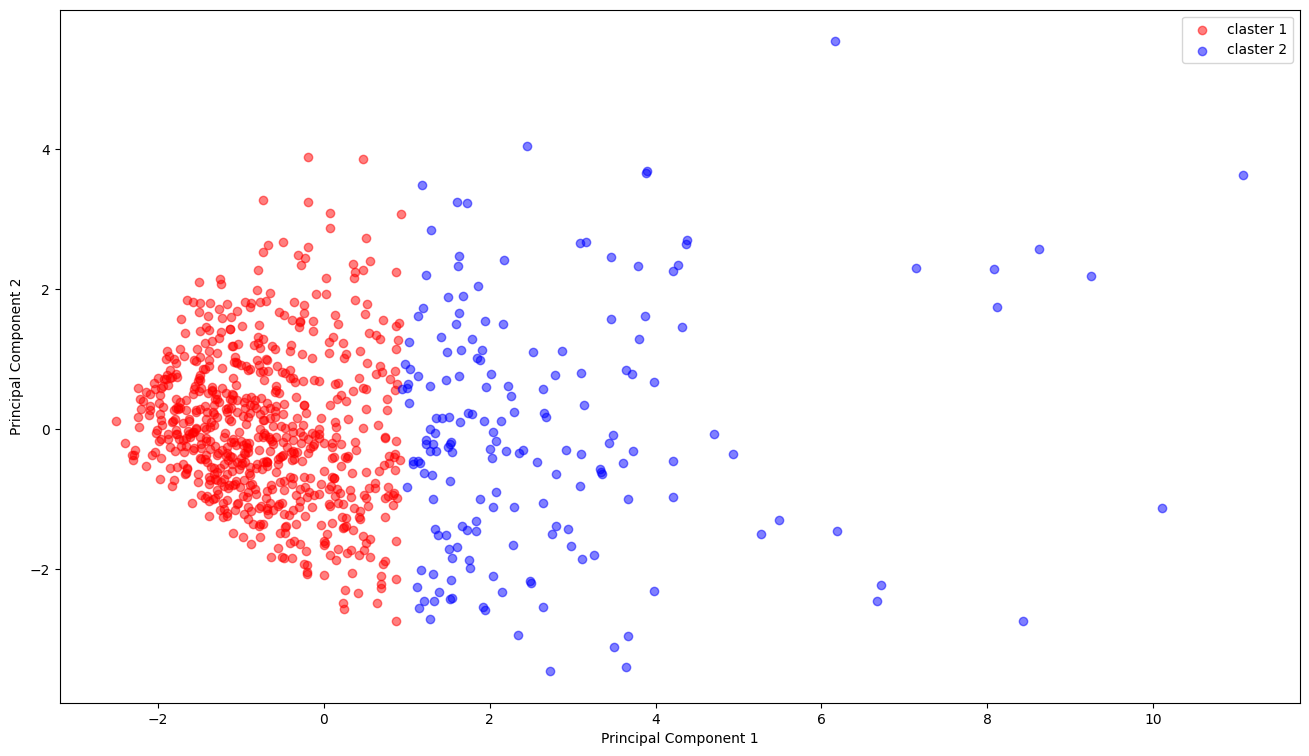

Ошибка: 0.3636107947956616


In [9]:
clasters, error = cluster_data(data_std, 2, method='kmeans')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

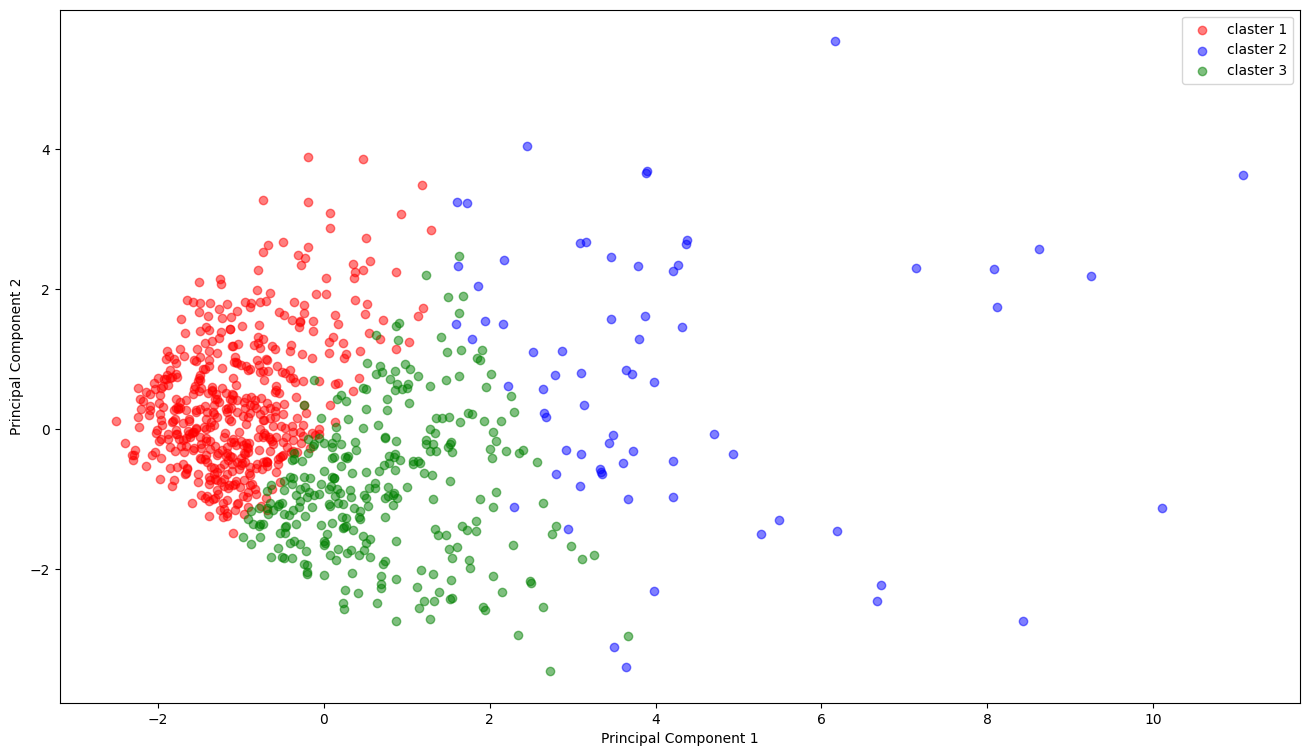

Ошибка: 0.2170076068493463


In [10]:
clasters, error = cluster_data(data_std, 3, method='kmeans')
visualize_clasters(clasters)
print(f'Ошибка: {error}')

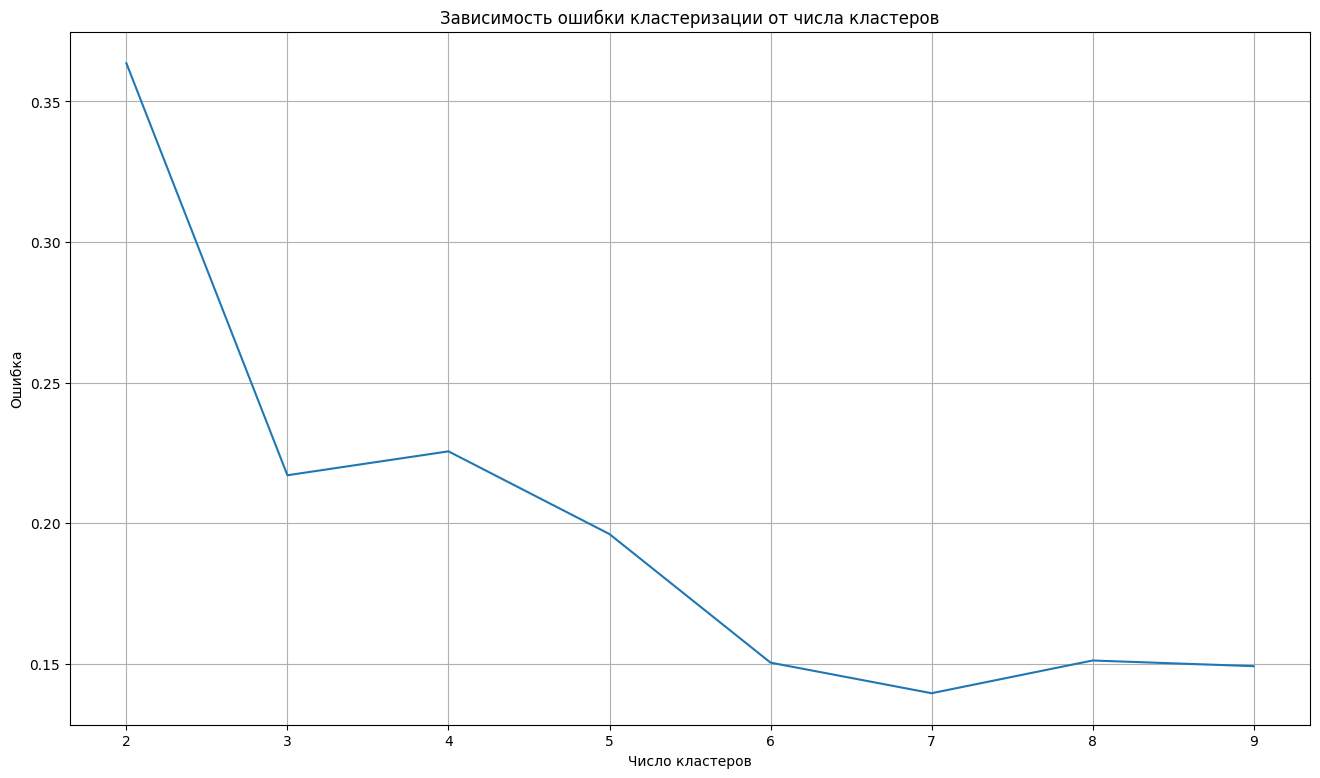

In [11]:
visualize_k_by_error(data_std, 'kmeans')

Из графиков выше можно видеть, что в обеих методах оценка лучше при параметре k = 2<br>
Из двух методов K-means дает как и наиболее высокое значение метрики sihouette, <br>
так и лучшее разделение на кластеры с точки зрения визуализации

### Кластеры с шумом

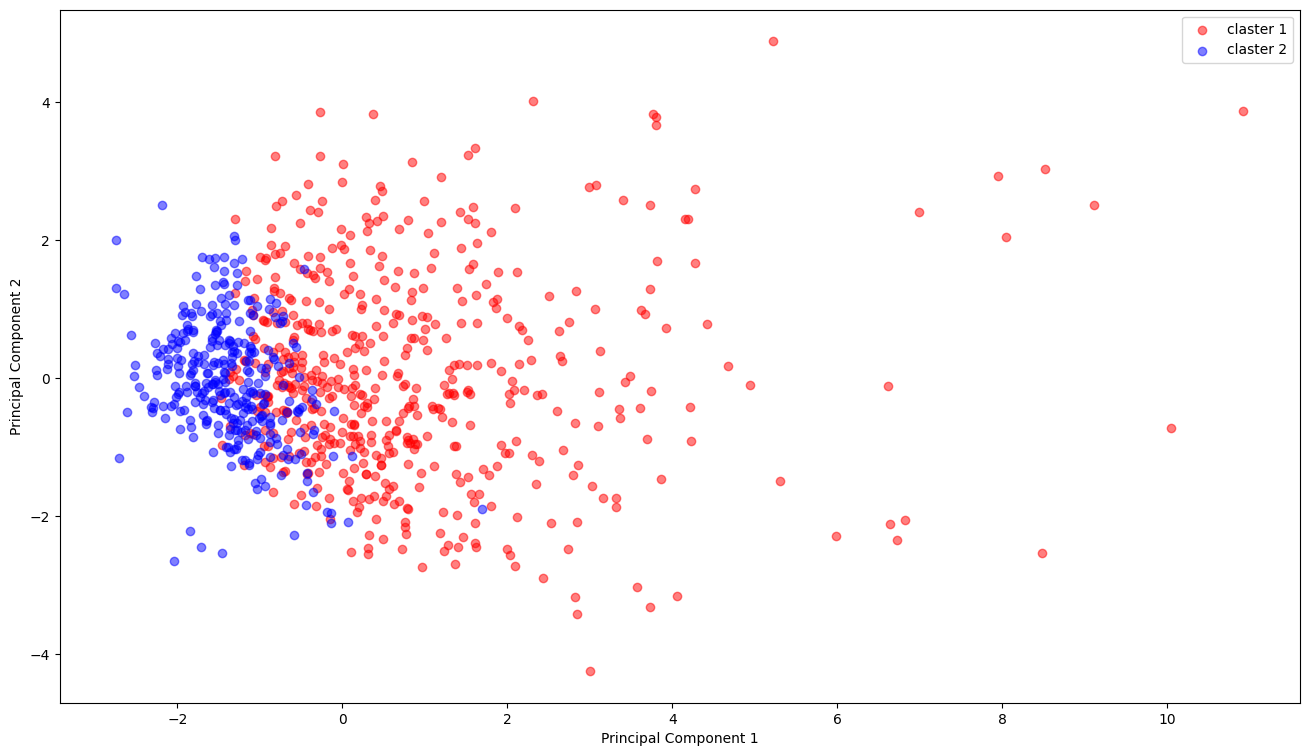

Ошибка: 0.12392598154633955


In [19]:
clasters, error = cluster_data(data_std, 2, method='kmedoids', noise_fraction=0.1)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

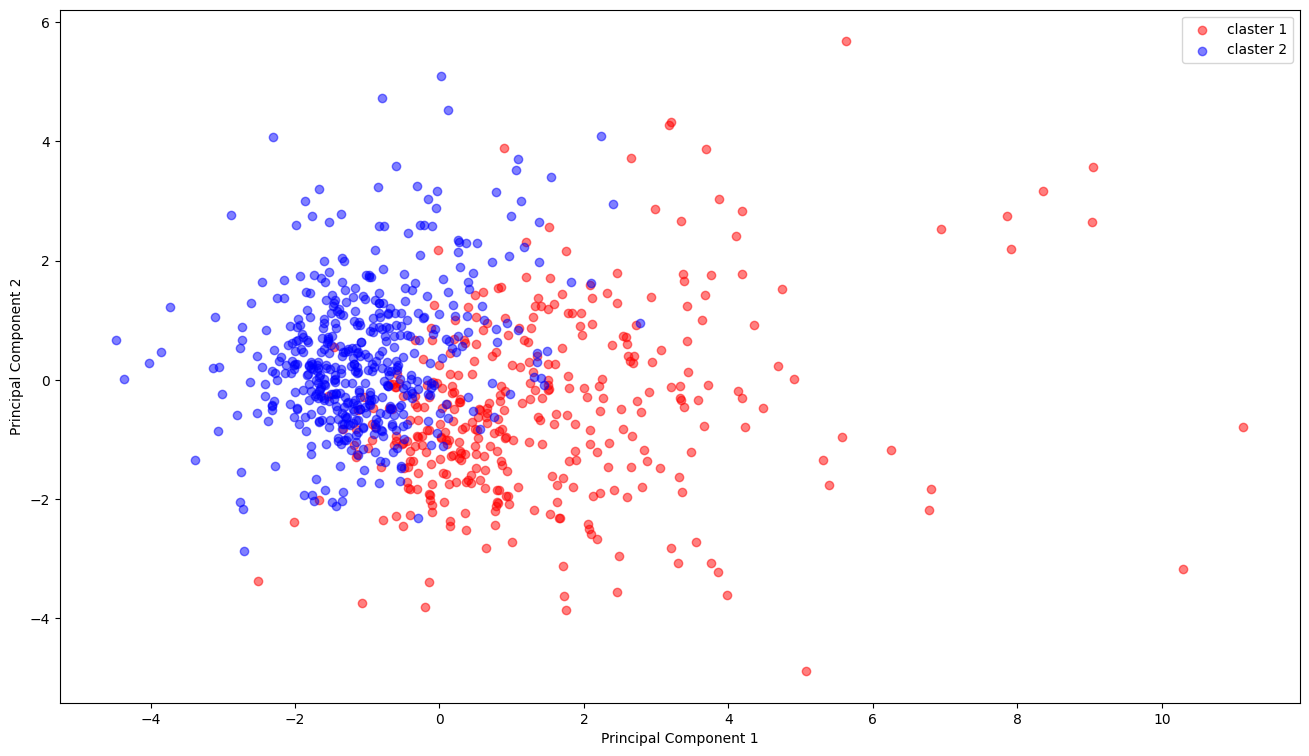

Ошибка: 0.19131376595696198


In [21]:
clasters, error = cluster_data(data_std, 2, method='kmedoids', noise_fraction=0.4)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

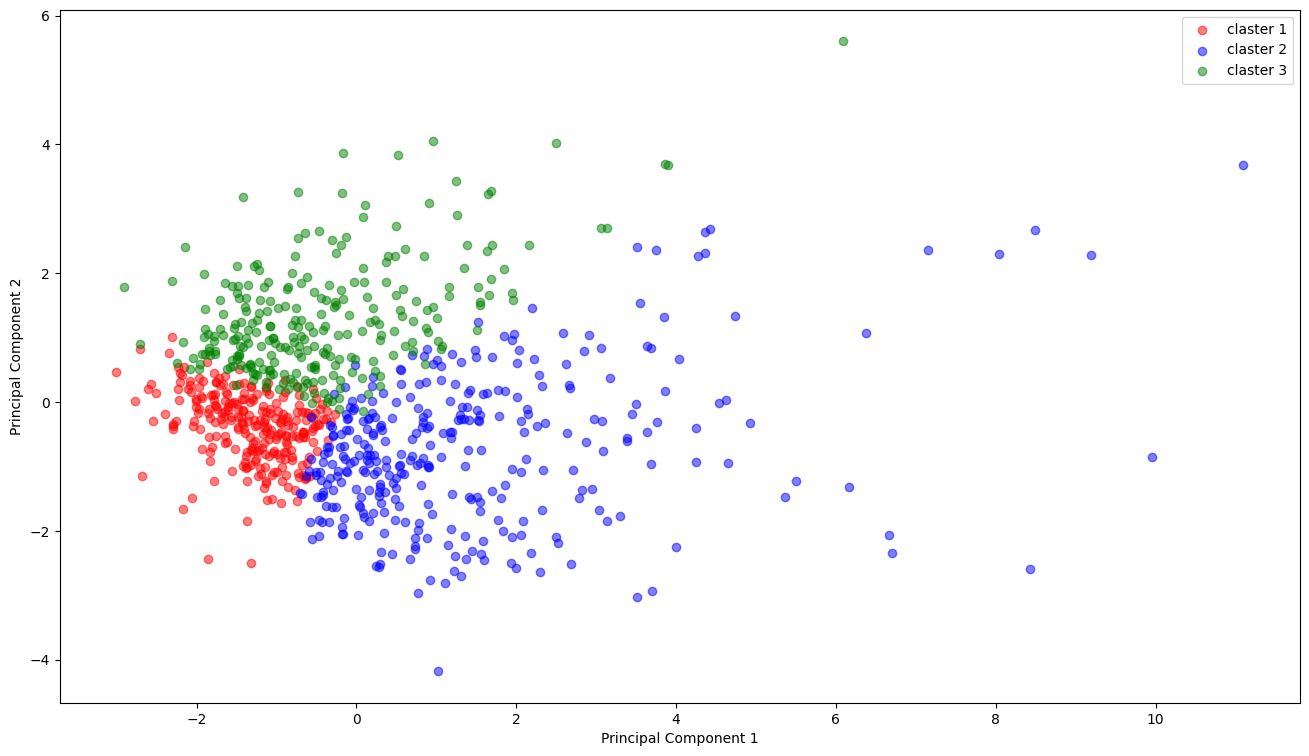

Ошибка: 0.11196933652113149


In [20]:
clasters, error = cluster_data(data_std, 3, method='kmedoids', noise_fraction=0.1)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

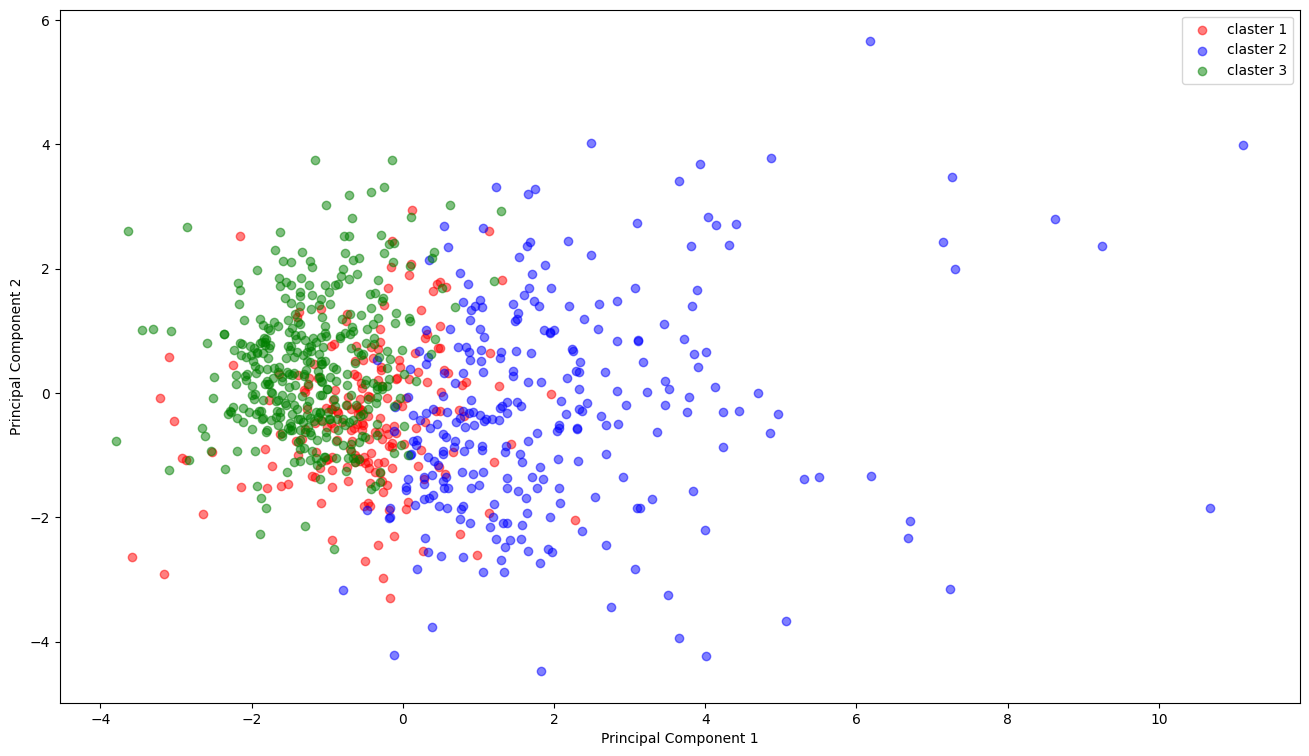

Ошибка: 0.10538461195442751


In [22]:
clasters, error = cluster_data(data_std, 3, method='kmedoids', noise_fraction=0.4)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

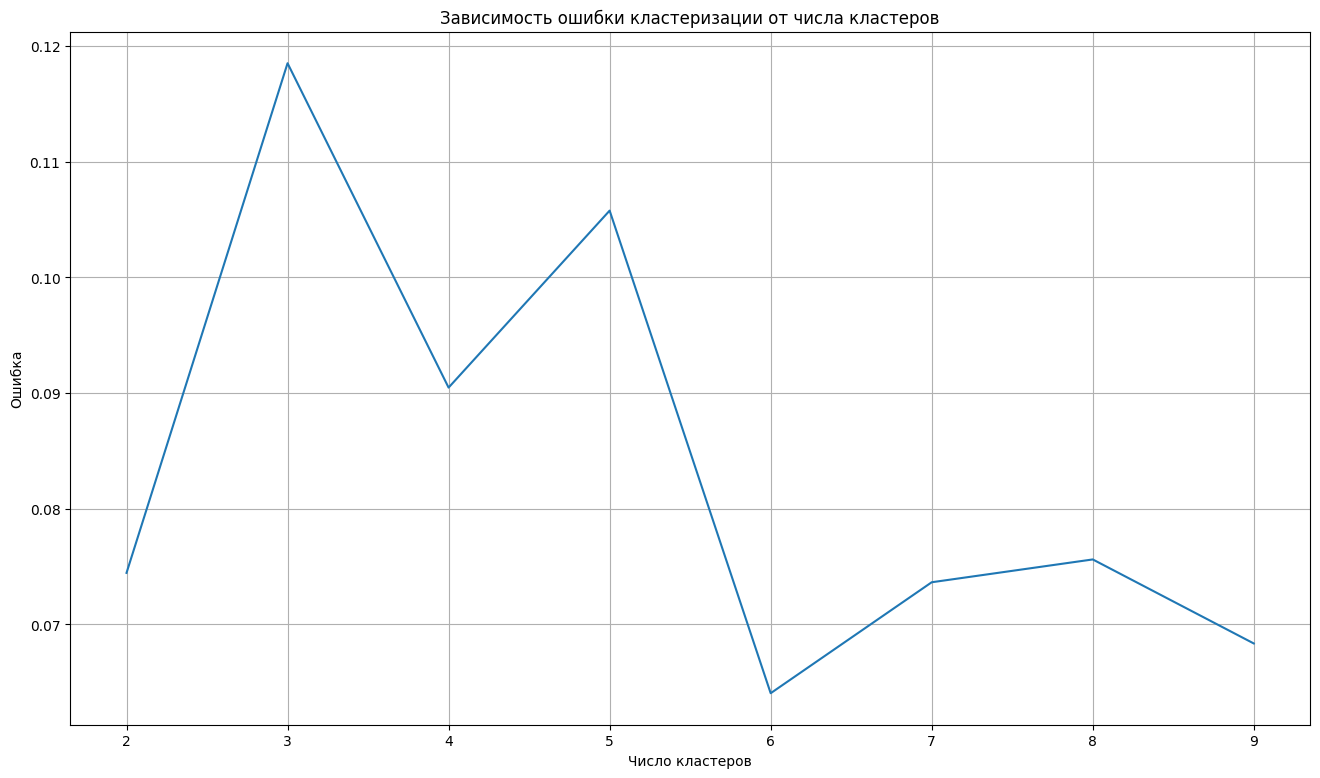

In [31]:
visualize_k_by_error(data_std, 'kmedoids', noise_fraction=0.1)

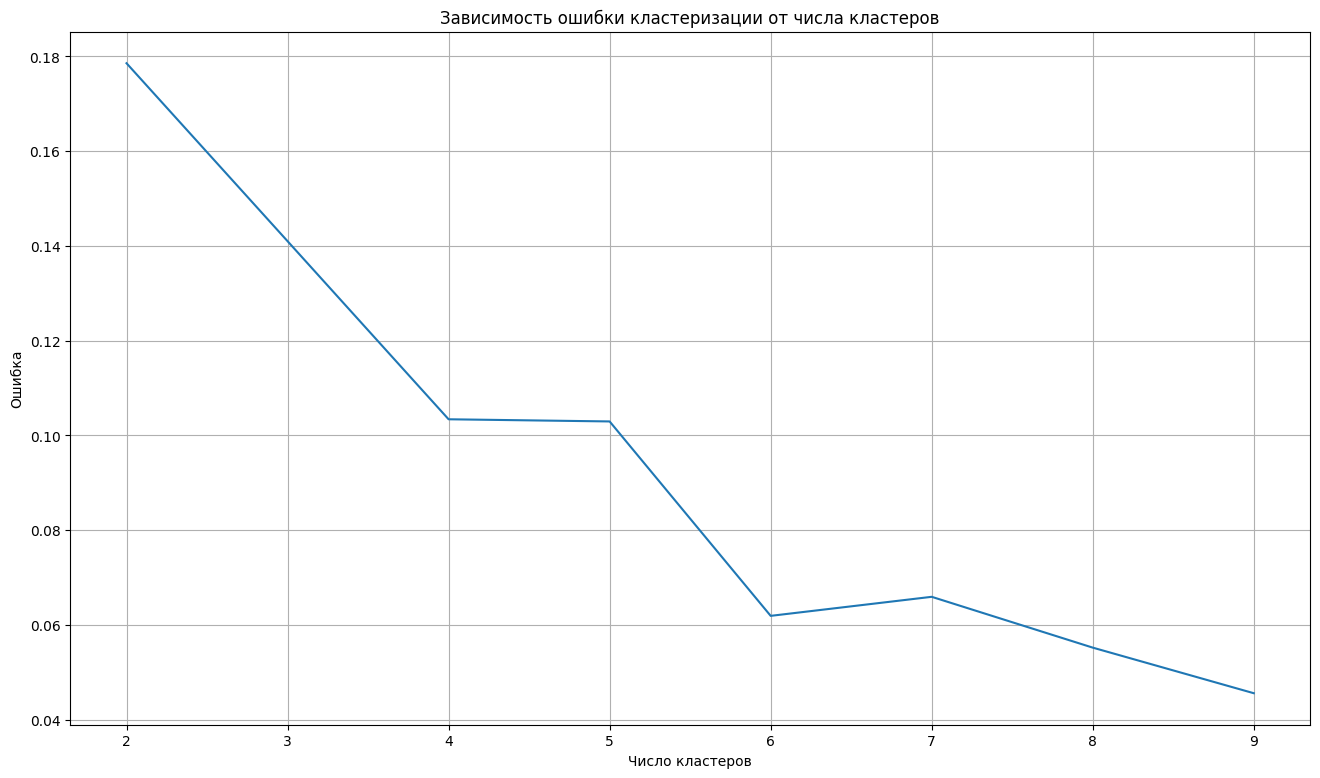

In [29]:
visualize_k_by_error(data_std, 'kmedoids', noise_fraction=0.4)

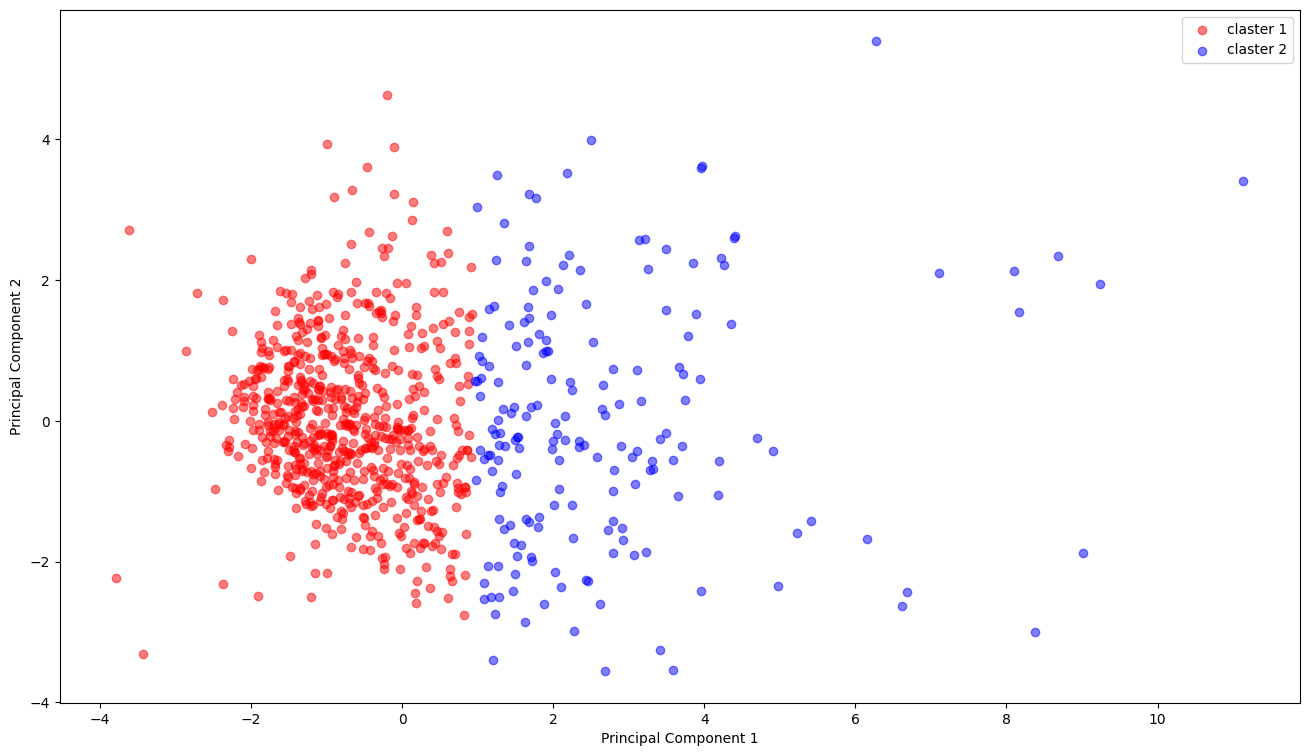

Ошибка: 0.34611092658632425


In [32]:
clasters, error = cluster_data(data_std, 2, method='kmeans', noise_fraction=0.1)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

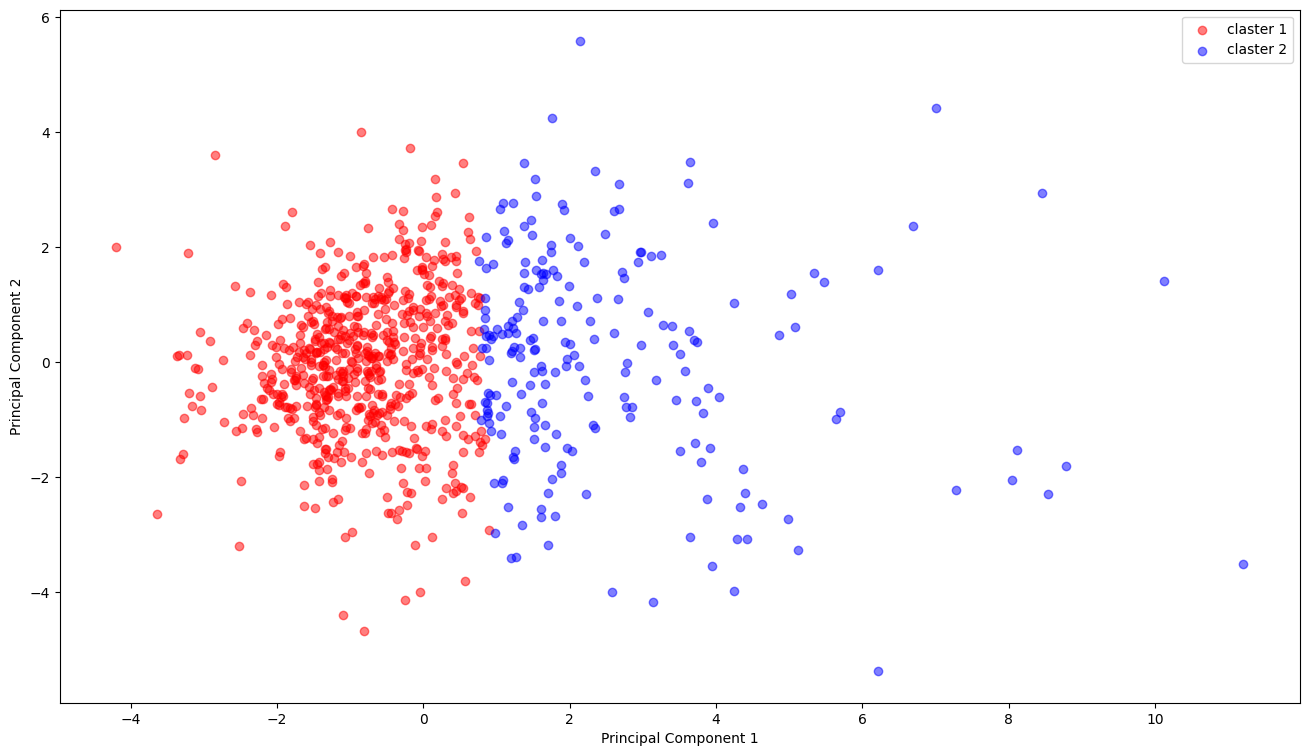

Ошибка: 0.2856751861262499


In [33]:
clasters, error = cluster_data(data_std, 2, method='kmeans', noise_fraction=0.4)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

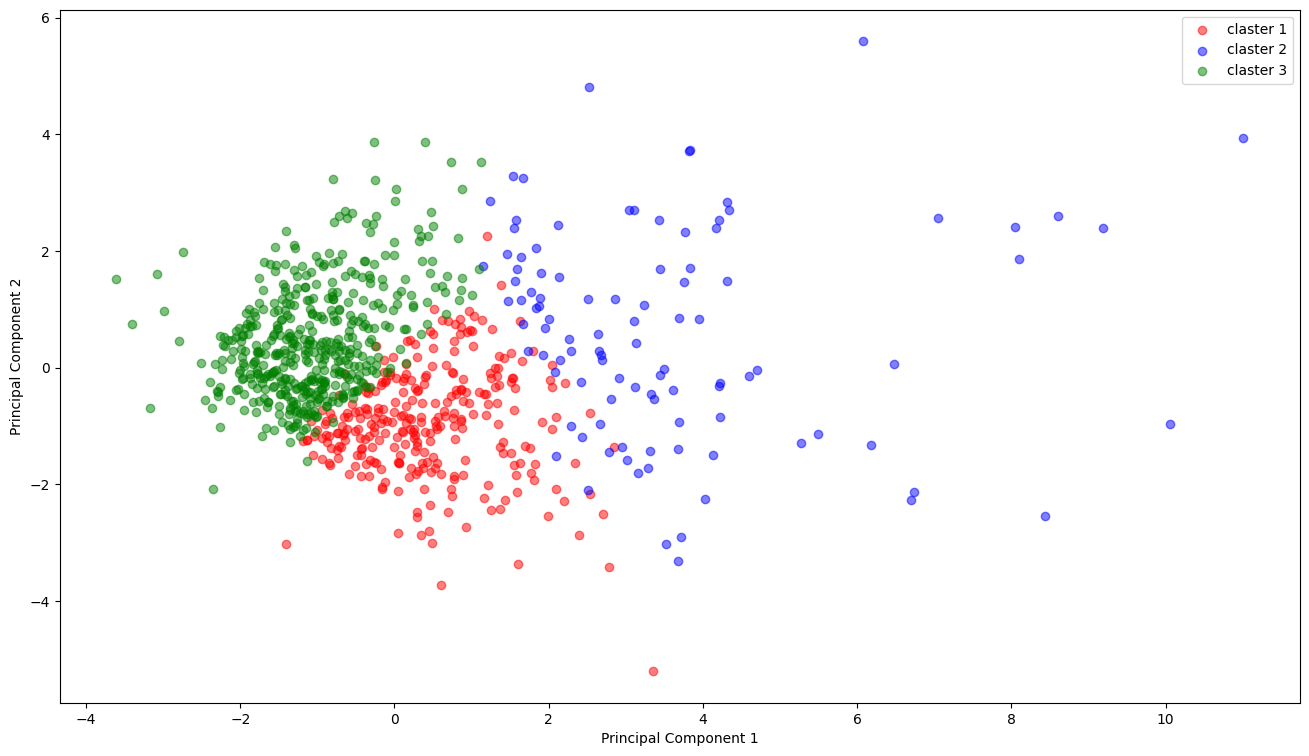

Ошибка: 0.1844161427136239


In [34]:
clasters, error = cluster_data(data_std, 3, method='kmeans', noise_fraction=0.1)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

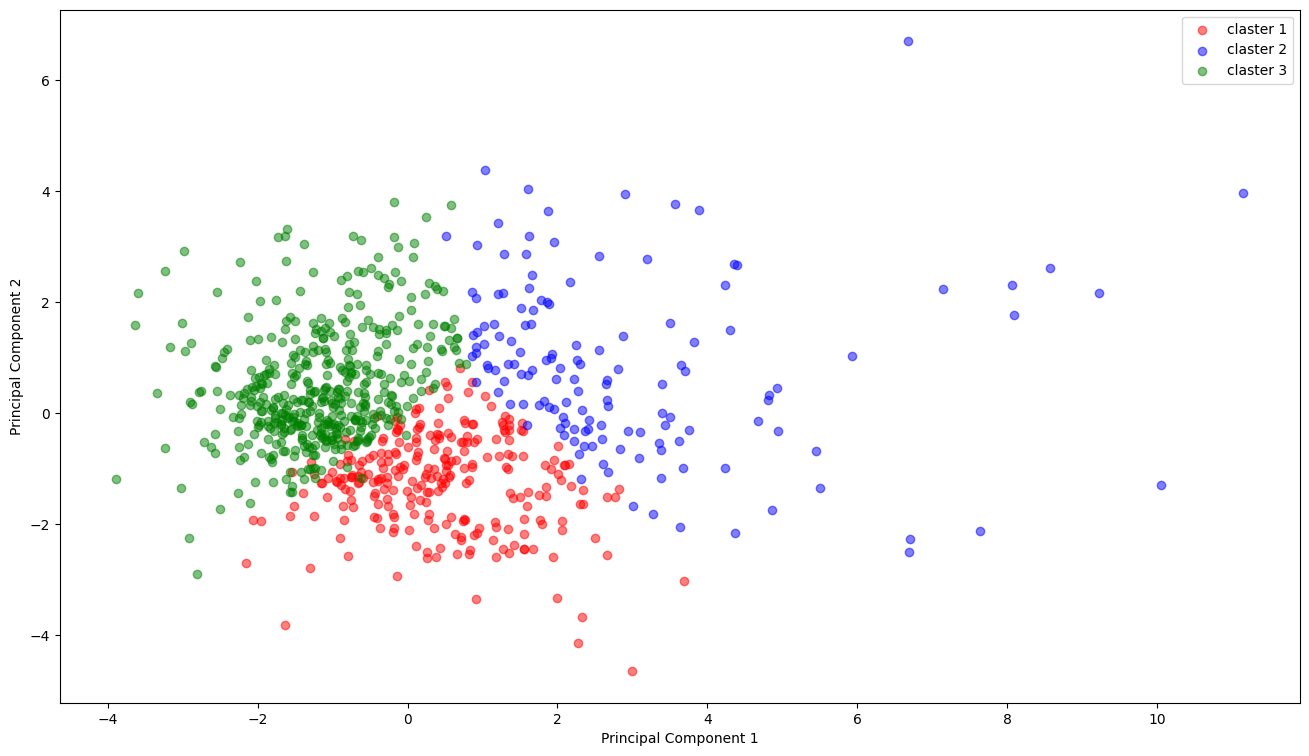

Ошибка: 0.1636446424471083


In [35]:
clasters, error = cluster_data(data_std, 3, method='kmeans', noise_fraction=0.4)
visualize_clasters(clasters)
print(f'Ошибка: {error}')

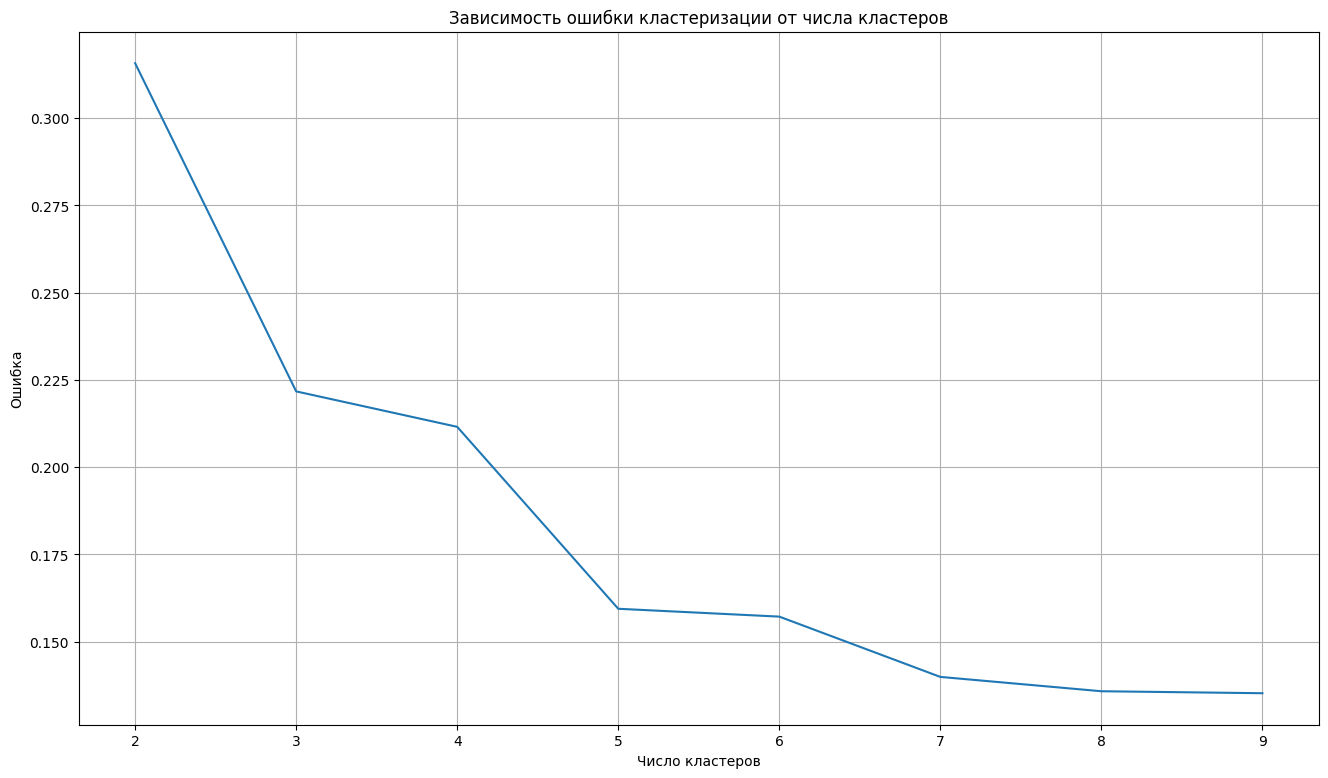

In [36]:
visualize_k_by_error(data_std, 'kmeans', noise_fraction=0.1)

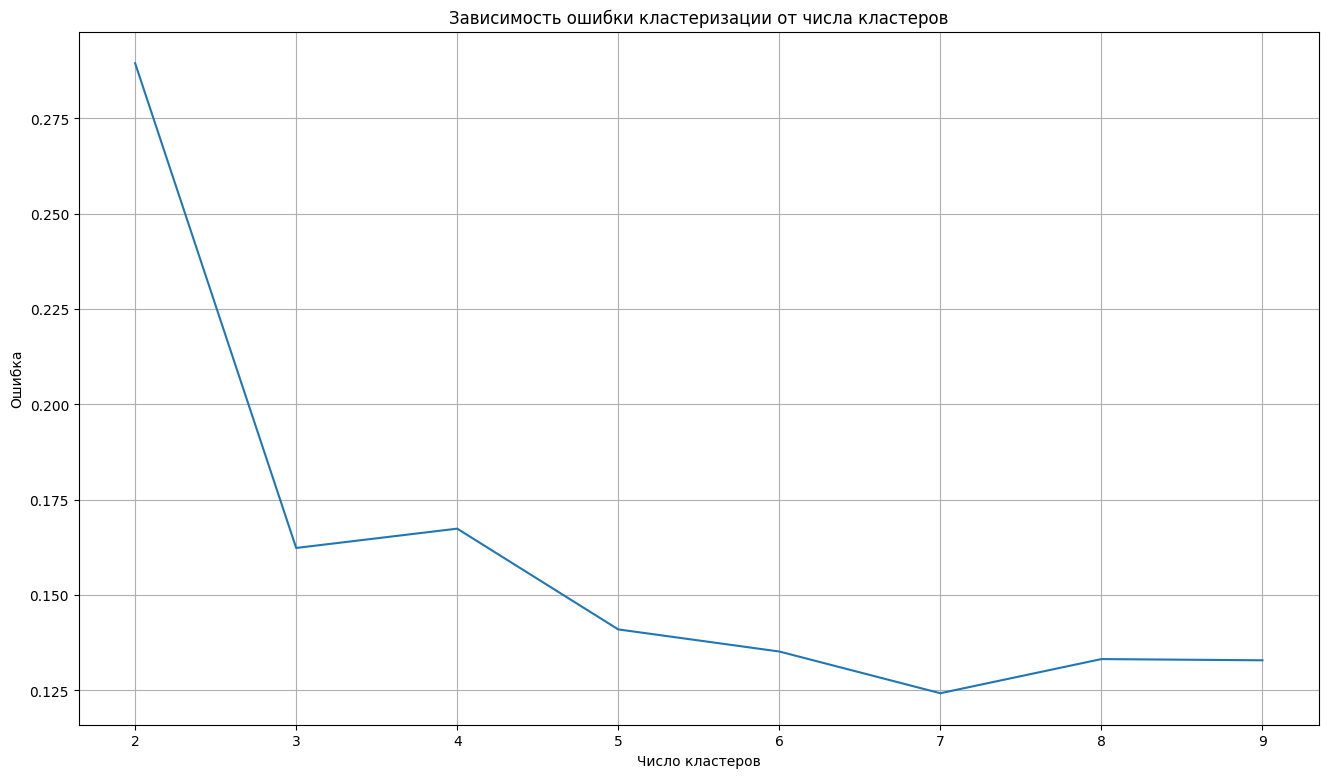

In [37]:
visualize_k_by_error(data_std, 'kmeans', noise_fraction=0.4)

Как можно видеть, шум может оказывать случайное влияние на silhouette - <br>
как и увеличивать метрику, так и уменьшать<br>
Также при наличии случайного шума графики зависимости кластеризации от числа кластеров<br>
могут принимать скачкообразный вид